Introduction:
1. Data Preprrocessing techniques:
    a. image resize
    b. Normalization 
    c. Data Augmentation (Example: Horizontal Flipping, rotation, scaling )
    d. Histogram Equalization
    e. Data Cleaning (Example: Removing images with low contrast)
    f. Noise Reduction (bluring and denoising)
    g. Splitting the Dataset (Example: 80-10-10 split)


Lets split the data first into training, validation and testing using the 75%, 15%, 15% respectively.

In [5]:
import os
import shutil
import random

# Get the current working directory
cwd = os.getcwd()

# Define paths relative to the working directory
data_dirOuter = os.path.join(cwd, 'data')
data_dir = os.path.join(data_dirOuter, 'data')  # data folder that contains all the images 
train_dir = os.path.join(data_dirOuter, 'train')  # Train directory inside the first data folder
val_dir = os.path.join(data_dirOuter, 'val')      # Validation directory inside the first data folder
test_dir = os.path.join(data_dirOuter, 'test')

# Define the split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Create directories for train, val, and test sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through each class folder
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)
        
        # Calculate split indices
        train_split = int(train_ratio * len(images))
        val_split = int((train_ratio + val_ratio) * len(images))
        
        # Move images to respective directories
        for i, image in enumerate(images):
            src_path = os.path.join(class_path, image)
            if i < train_split:
                dst_dir = os.path.join(train_dir, class_name)
            elif i < val_split:
                dst_dir = os.path.join(val_dir, class_name)
            else:
                dst_dir = os.path.join(test_dir, class_name)
            
            os.makedirs(dst_dir, exist_ok=True)
            shutil.copy(src_path, dst_dir)


now we are going to use CNN for classifying the images 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the data 

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3368 - loss: 1.7761 - val_accuracy: 0.4689 - val_loss: 1.5196
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4505 - loss: 1.4705 - val_accuracy: 0.5078 - val_loss: 1.4282
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5369 - loss: 1.2962 - val_accuracy: 0.5674 - val_loss: 1.1976
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6218 - loss: 1.0612 - val_accuracy: 0.6192 - val_loss: 1.0909
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6622 - loss: 0.9662 - val_accuracy: 0.6710 - val_loss: 0.9916
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6957 - loss: 0.8556 - val_accuracy: 0.6386 - val_loss: 0.9998
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7226 - loss: 0.7809 - val_accuracy: 0.6839 - val_loss: 0.9505
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7403 - loss: 0.7505 - 

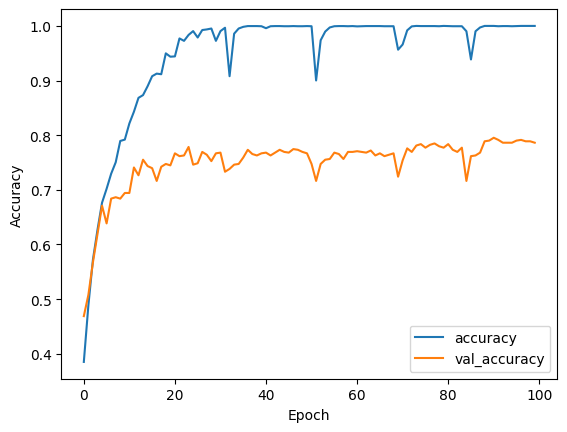

In [20]:
import os
import shutil
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

cwd = os.getcwd()
data_dirOuter = os.path.join(cwd, 'data')
train_dir = os.path.join(data_dirOuter, 'train')
val_dir = os.path.join(data_dirOuter, 'val')
test_dir = os.path.join(data_dirOuter, 'test')

# Define the classes
classes = ["bottle", "basket", "food", "cup", "jar", "can", "dish", "mug", "glass"]

from PIL import Image

def load_data(data_dir, image_size=(32, 32)):
    X = []
    y = []
    for class_id, class_dir in enumerate(sorted(os.listdir(data_dir)), 1):
        if os.path.isdir(os.path.join(data_dir, class_dir)):
            for image_name in os.listdir(os.path.join(data_dir, class_dir)):
                image_path = os.path.join(data_dir, class_dir, image_name)
                image = Image.open(image_path)
                image = image.resize(image_size)
                image = np.array(image) / 255.0  # Normalize the image
                X.append(image)
                y.append(class_id - 1)  # Subtract 1 to convert class_id to zero-based index
    return np.array(X), np.array(y)


# Load the data
X_train, y_train = load_data(train_dir)
X_val, y_val = load_data(val_dir)
X_test, y_test = load_data(test_dir)

# Normalize the images
#X_train = X_train / 255.0
#X_val = X_val / 255.0
#X_test = X_test / 255.0

# Define and compile the model
cnn = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(classes), activation='softmax')  # Use len(classes) as the number of output units
])

cnn.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = cnn.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = cnn.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


hyperTuning: choosing the best hypertuning paramaters

In [50]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import accuracy_score

# Define the function to create and train the model
def train_model(filters1, filters2, dense_units, epochs, batch_size, X_train, y_train, X_val, y_val):
    model = Sequential([
        Conv2D(filters=filters1, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])),
        MaxPooling2D((2, 2)),
        Conv2D(filters=filters2, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(len(classes), activation='softmax')
    ])
    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    return model, history.history['val_accuracy'][-1]

# Define the grid search parameters
param_grid = {
    'filters1': [32, 64],
    'filters2': [64, 128],
    'dense_units': [64, 128],
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

best_accuracy = 0
best_params = None

# Perform grid search
for filters1 in param_grid['filters1']:
    for filters2 in param_grid['filters2']:
        for dense_units in param_grid['dense_units']:
            for epochs in param_grid['epochs']:
                for batch_size in param_grid['batch_size']:
                    model, val_accuracy = train_model(filters1, filters2, dense_units, epochs, batch_size, X_train, y_train, X_val, y_val)
                    if val_accuracy > best_accuracy:
                        best_accuracy = val_accuracy
                        best_params = {'filters1': filters1, 'filters2': filters2, 'dense_units': dense_units, 'epochs': epochs, 'batch_size': batch_size}

# Summarize results
print("Best validation accuracy:", best_accuracy)
print("Best parameters:", best_params)


Best validation accuracy: 0.7940414547920227
Best parameters: {'filters1': 32, 'filters2': 64, 'dense_units': 128, 'epochs': 50, 'batch_size': 32}


save the best model

In [53]:
# Define the best model architecture based on the best parameters
best_model = Sequential([
    Conv2D(filters=best_params['filters1'], kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])),
    MaxPooling2D((2, 2)),
    Conv2D(filters=best_params['filters2'], kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(best_params['dense_units'], activation='relu'),
    Dense(len(classes), activation='softmax')
])

# Compile the best model
best_model.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the best model using the entire training data
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Save the best model
best_model.save('best_model_reem.h5')



test the model on the test data

In [56]:
# Load the best model
from tensorflow.keras.models import load_model

best_model = load_model('best_model_reem.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test data
predictions = best_model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy manually
test_accuracy_manual = accuracy_score(y_test, predicted_classes)
print("Test Accuracy (Manual):", test_accuracy_manual)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7676 - loss: 1.3697
Test Loss: 1.7958601713180542
Test Accuracy: 0.7218628525733948
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Test Accuracy (Manual): 0.7218628719275549
